# 3. DATA VISUALIZATION & ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ufos = pd.read_csv("ufo-1.csv")

C:\Users\Romka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3.1. UFO SIGHTINGS OVER YEAR

In [3]:
ufos["datetime"] = pd.to_datetime(ufos['datetime'])

In [4]:
ufos["year"] = ufos["datetime"].dt.year

In [5]:
ufos

,Unnamed: 0,Unnamed: 0.1,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,0,0,1949-10-10 20:30:00,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949
1,1,1,1949-10-10 21:00:00,lackland afb,tx,United States,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949
2,2,2,1955-10-10 17:00:00,chester,NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955
3,3,3,1956-10-10 21:00:00,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956
4,4,4,1960-10-10 20:00:00,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85899,85899,85899,2013-09-09 22:00:00,napa,ca,United States,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,2013
85900,85900,85900,2013-09-09 22:20:00,vienna,va,United States,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,2013
85901,85901,85901,2013-09-09 23:00:00,edmond,ok,United States,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778,2013
85902,85902,85902,2013-09-09 23:00:00,starr,sc,United States,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833,2013


In [6]:
ufos.drop(ufos.columns[0], axis=1, inplace=True)

In [7]:
ufos.drop(ufos.columns[0], axis=1, inplace=True)

In [8]:
ufos[ufos["year"].isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year


<AxesSubplot:xlabel='year', ylabel='count'>

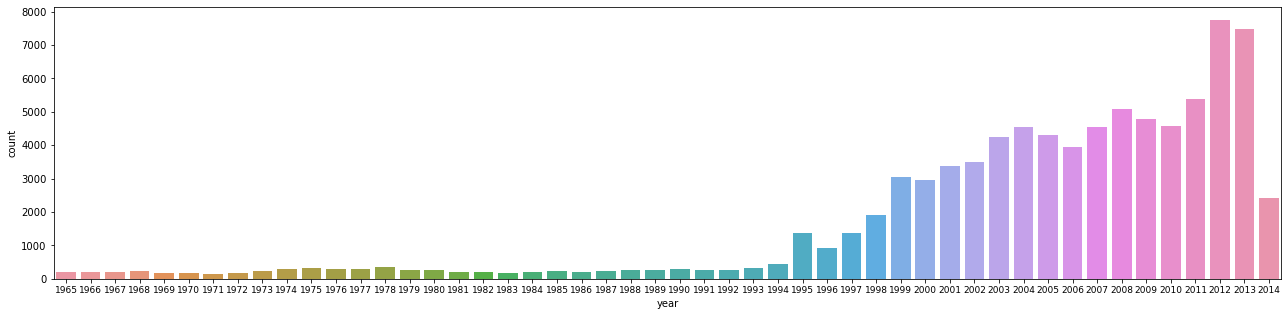

In [9]:
plt.figure(figsize=(22,5))
plt.xticks(fontsize=9)
sns.countplot(data=ufos, x="year", order=ufos["year"].value_counts()[:50].index.sort_values())

<AxesSubplot:xlabel='year', ylabel='count'>

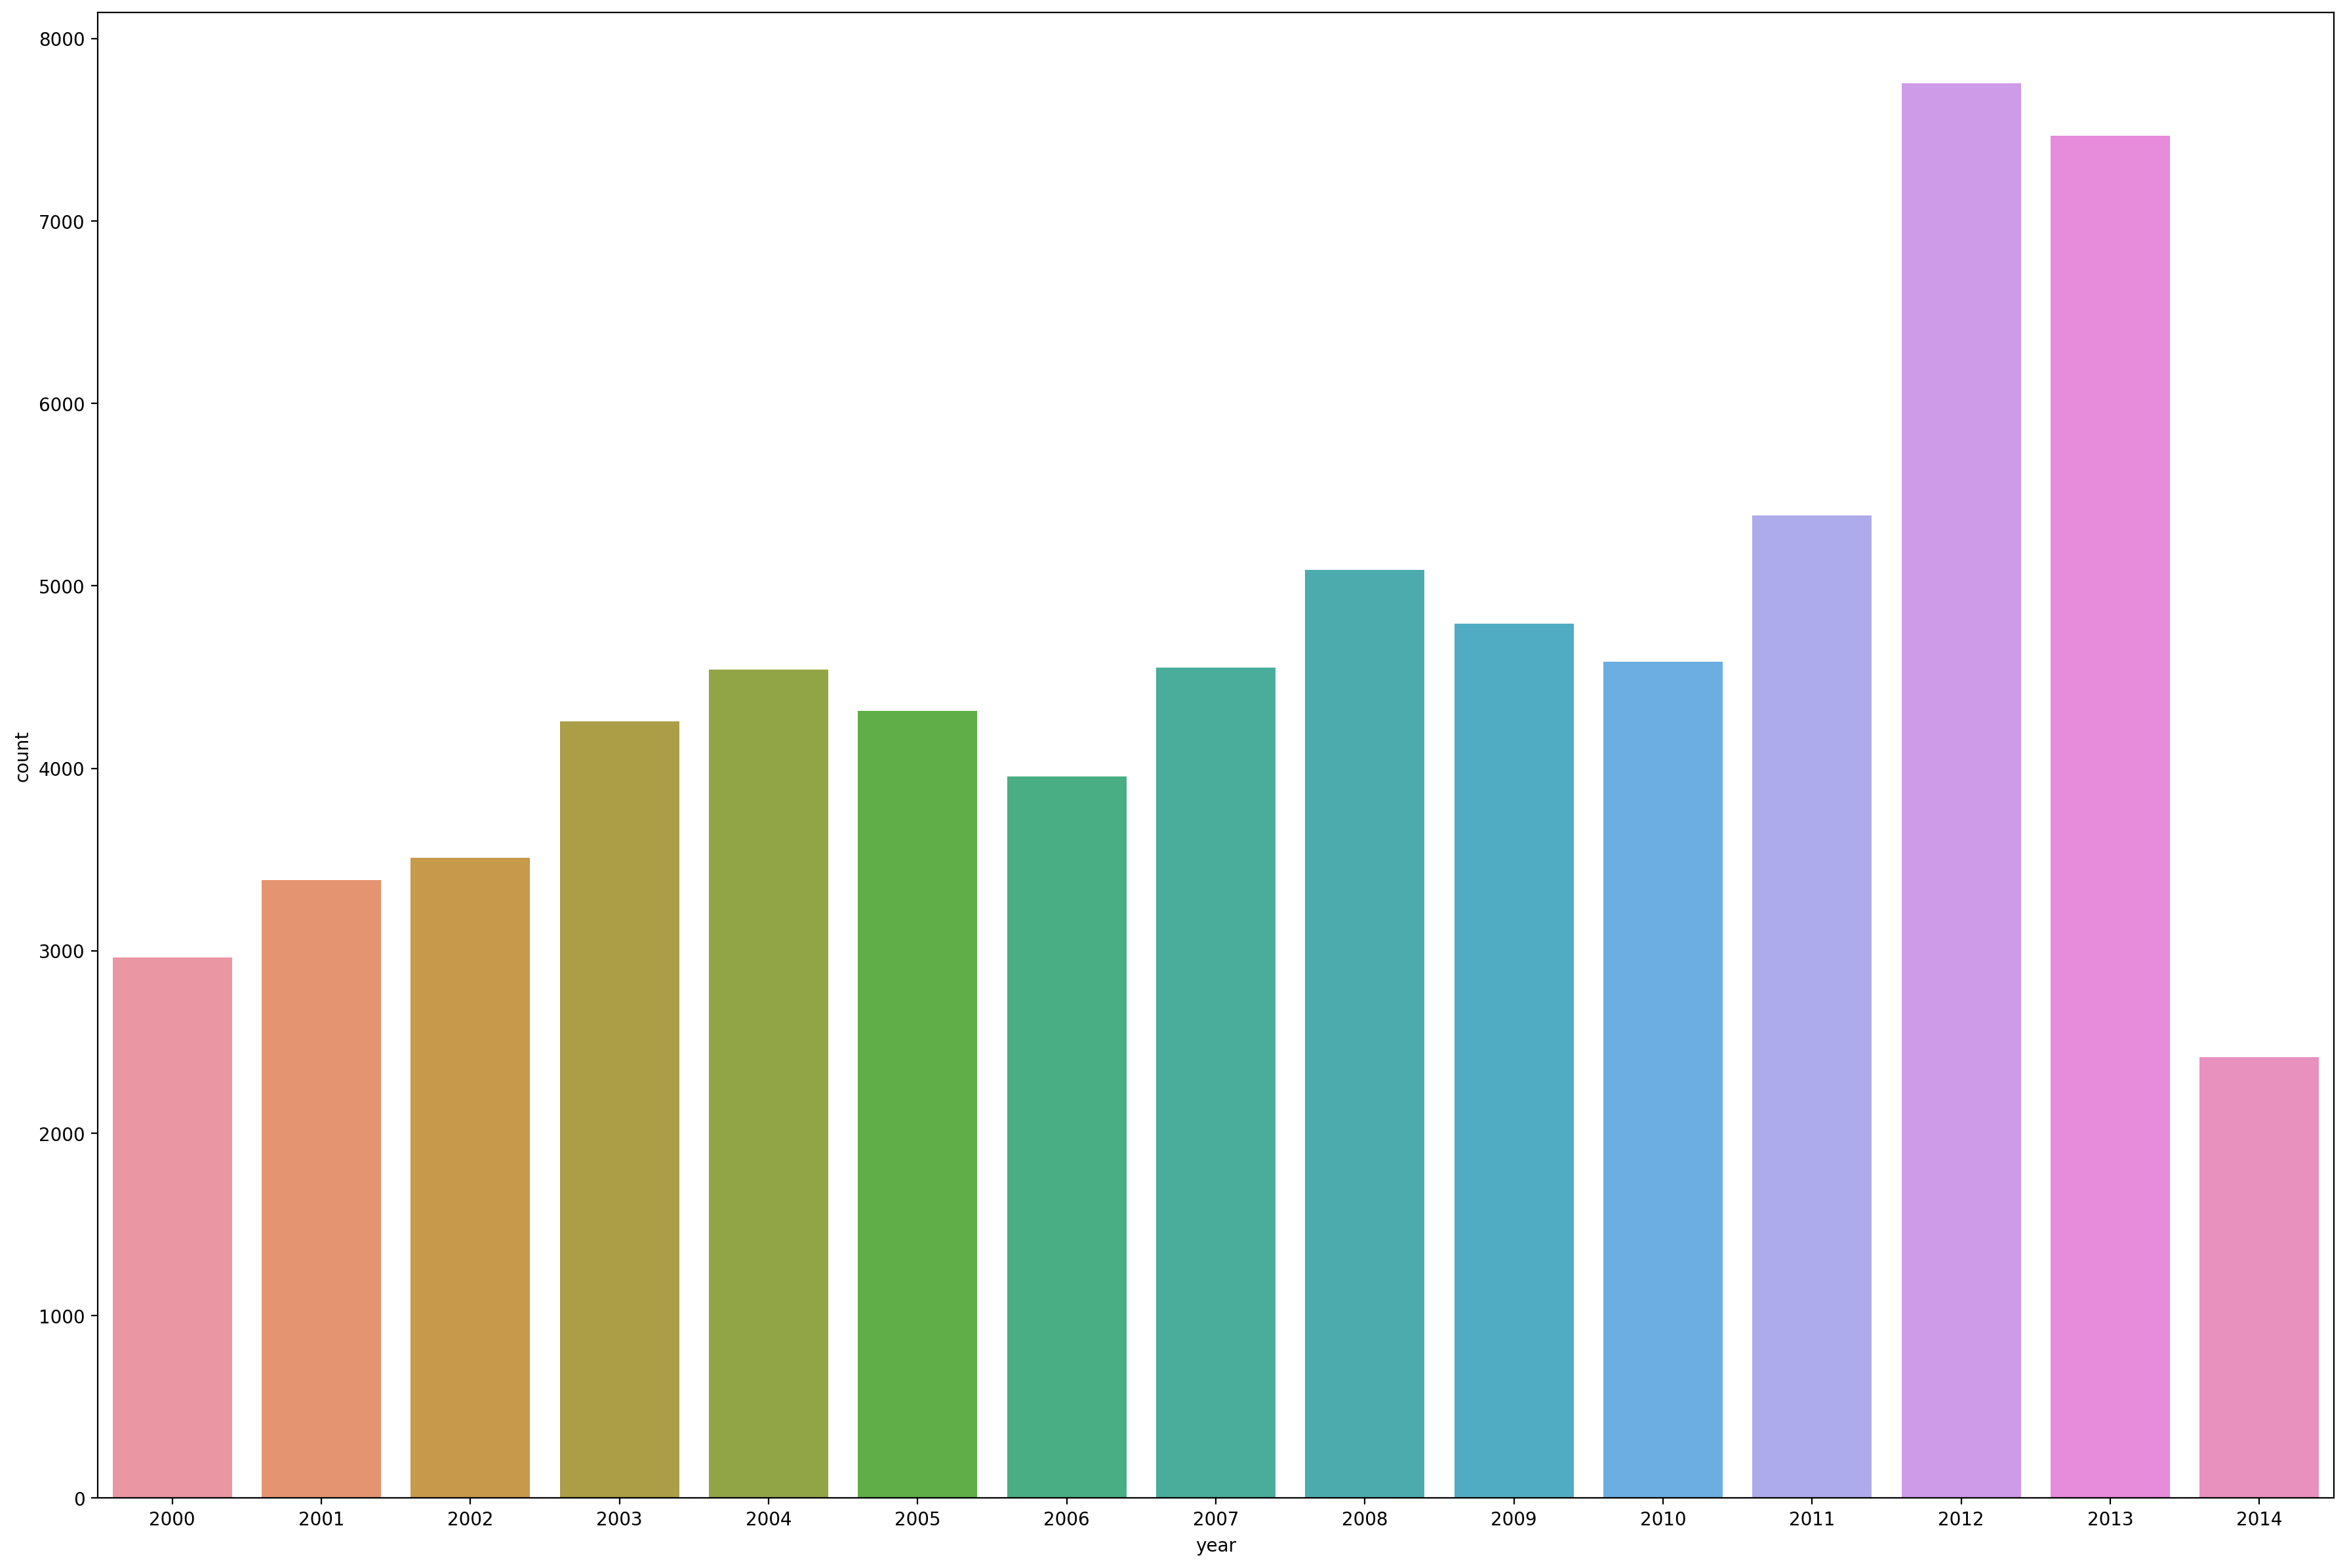

In [10]:
plt.figure(figsize=(22,15),dpi=200)
sns.countplot(data=ufos[ufos["year"] > 1999], x= "year")

## 3.2. UFO SIGHTINGS BASED ON LOCATION

### 3.2.1. BY COUNTRY

In [11]:
ufos["country"].value_counts()[:10]

United States     77036
Canada             3234
United Kingdom     2380
Australia           654
Mexico              227
India               207
New Zealand         134
Germany             130
Netherlands         115
Puerto Rico          99
Name: country, dtype: int64

In [14]:
ufos["country"].value_counts().sum() # 85904 ufo sightings have been reported until the middle of 2014

85904

<AxesSubplot:xlabel='country', ylabel='count'>

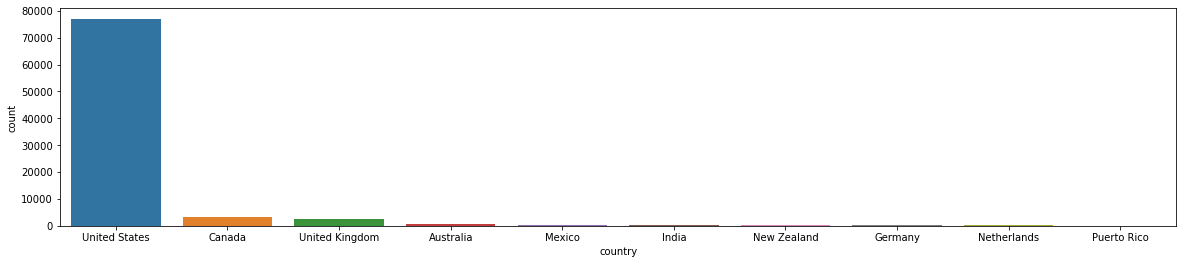

In [16]:
plt.figure(figsize=(20,4))
sns.countplot(data=ufos, x="country",order=ufos["country"].value_counts()[:10].index)

### 3.2.2. BY STATE

In [17]:
ufos["state"].value_counts()

ca    10332
wa     4594
fl     4551
tx     3978
ny     3465
      ...  
nt       23
pe       23
yt       14
yk        7
vi        1
Name: state, Length: 68, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

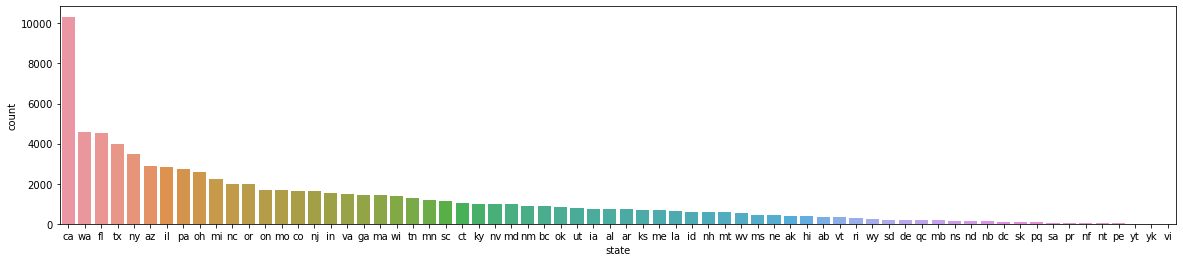

In [18]:
plt.figure(figsize=(20,4))
sns.countplot(data=ufos, x="state", order=ufos["state"].value_counts().index)


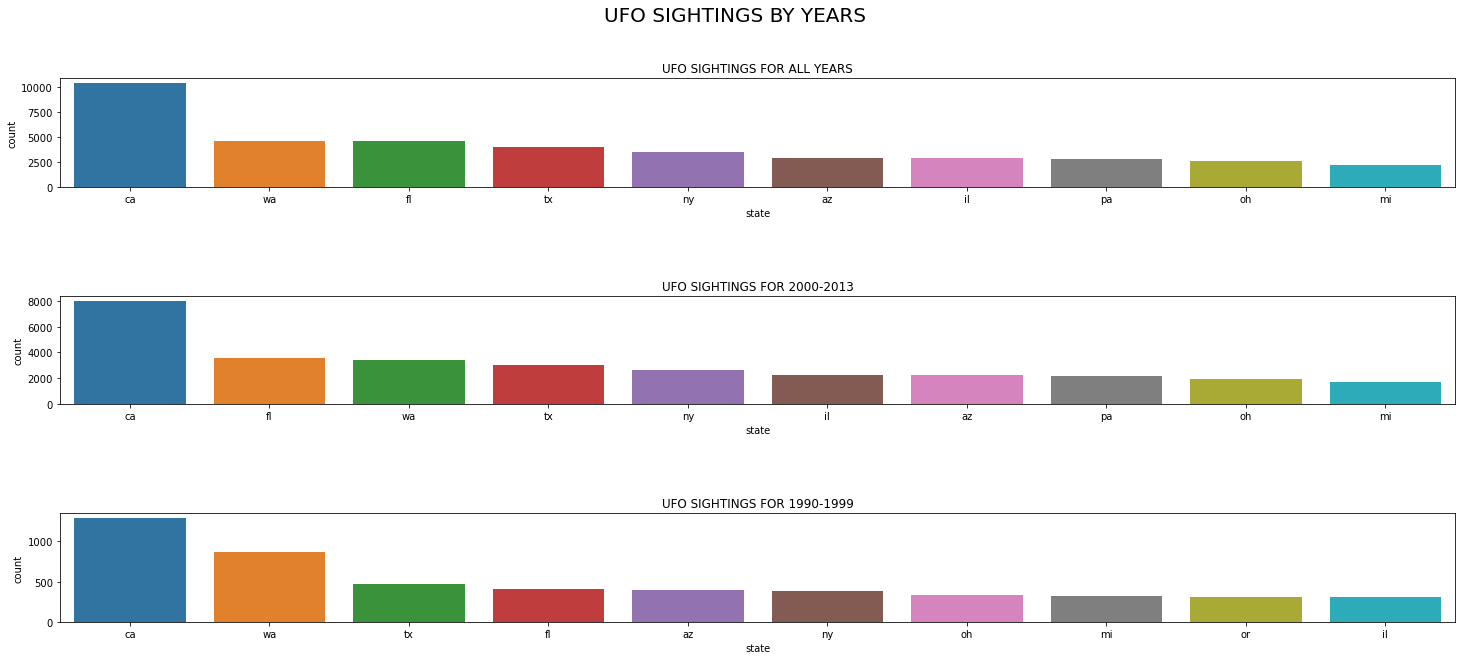

In [19]:

fig, axes = plt.subplots(nrows=3,figsize=(25,10))

sns.countplot(ax=axes[0], data=ufos, x="state", order=ufos["state"].value_counts()[:10].index)
axes[0].set_title("UFO SIGHTINGS FOR ALL YEARS")
sns.countplot(ax=axes[1], data=ufos[ufos["year"].isin(list(range(2000,2014)))], x="state", order=ufos["state"][ufos["year"].isin(list(range(2000,2014)))].value_counts()[:10].index)
axes[1].set_title("UFO SIGHTINGS FOR 2000-2013")
sns.countplot(ax=axes[2], data=ufos[ufos["year"].isin(list(range(1990, 2000)))], x="state", order=ufos["state"][ufos["year"].isin(list(range(1990,2000)))].value_counts()[:10].index)
axes[2].set_title("UFO SIGHTINGS FOR 1990-1999")

fig.suptitle("UFO SIGHTINGS BY YEARS",fontsize=20)
fig.subplots_adjust(wspace=1, hspace=1)

- ### I don't include 2014, because the 2014 data does not cover all the months.
- ### When we look at California in general and look at the last 14 years, we can see that it is the state with the most UFO sightings.
- ### Even if Washington is ahead overall, we see that Florida has been ahead of Washington in the last 14 years.
- ### Same thing happened between Illinois and Arizona

In [20]:
y = ufos[ufos["state"].isin(["wa","fl"])].groupby(["state","year"]).count()
y = y.reset_index()

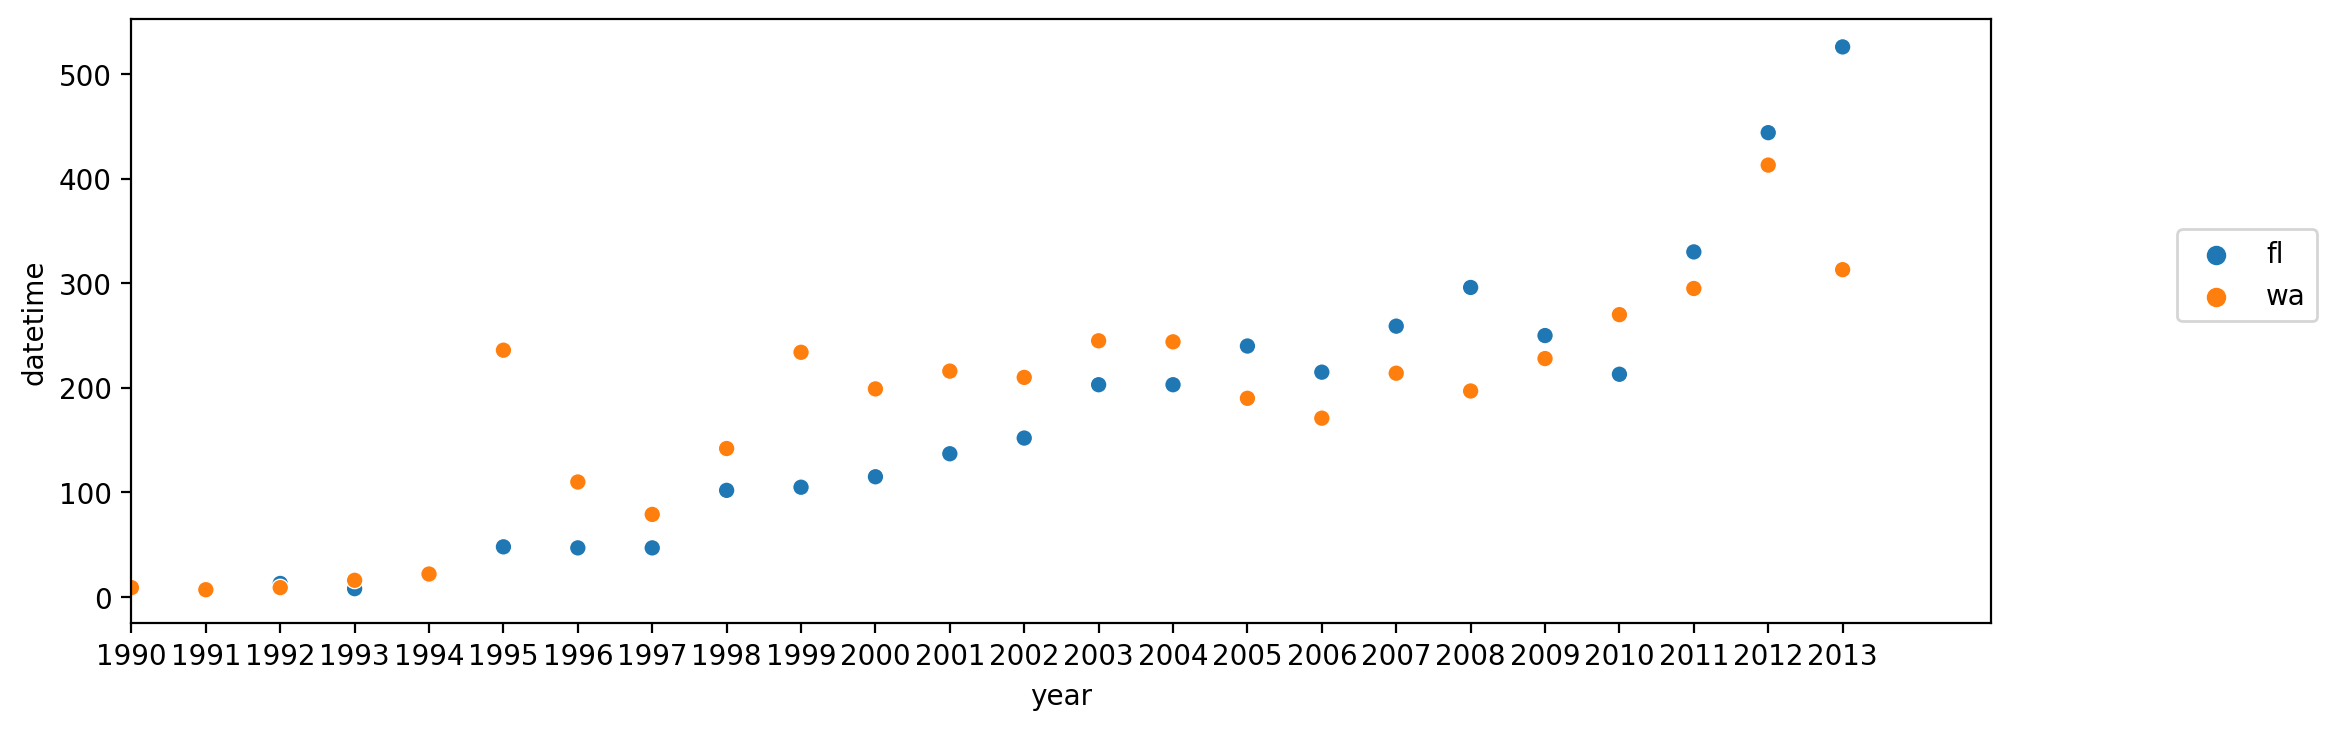

In [21]:
plt.figure(figsize=(12,4),dpi=200)
the_graph = sns.scatterplot(x="year", y="datetime", data=y[y["year"]!=2014], hue="state" )
the_graph.legend(loc=(1.1,0.5))
the_graph.set_xlim([1990,2015])
the_graph.set_xticks(list(range(1990,2014)))
plt.show()

- ### As we see, until 1994, they've roughly same values. However, between 1994 and 2005, In Washington DC, more ufo cases reported. After 2005, Florida has roughly more ufo reports. Especially in 2013, Florida has much more ufo reports

In [44]:
y_1 = ufos[ufos["state"].isin(["az","il"])].groupby(["state","year"]).count()
y_1 = y_1.reset_index()

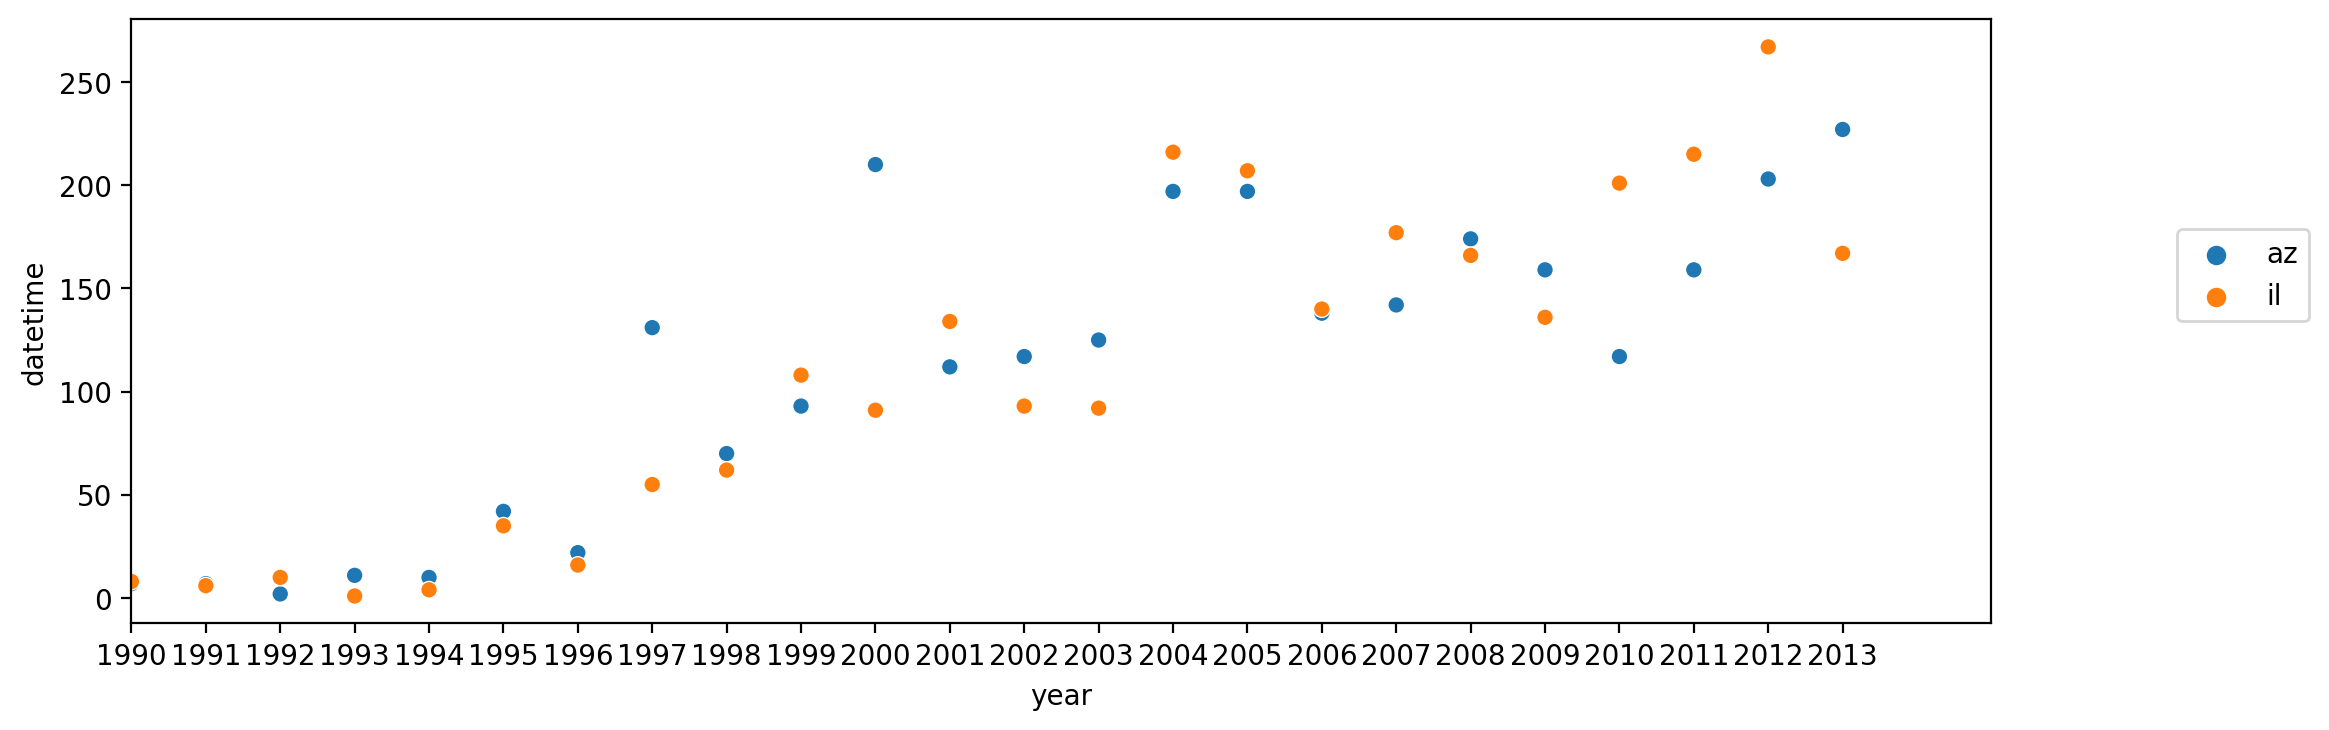

In [45]:
plt.figure(figsize=(12,4),dpi=200)
the_graph = sns.scatterplot(x="year", y="datetime", data=y_1[y_1["year"]!=2014], hue="state" )
the_graph.legend(loc=(1.1,0.5))
the_graph.set_xlim([1990,2015])
the_graph.set_xticks(list(range(1990,2014)))
plt.show()

- ### From this graph, we can say until 1997 the number of reports similarly advanced. Between 1997 and 2004, Illinois has roughly more reports. From 2004 to 2010, the reports number are almost same. From 2010 to 2013, Illinoi have more reports but in 2013, Arizona has much more reports.

- ### Before 1990, it has really little effect to total reports.

### 3.3.3. BY CITIES

In [22]:
len(ufos["city"].unique()) #There are 19147 cities that reported ufo sightings.

19147

In [23]:
ufos["city"].value_counts()[:20]

seattle           561
phoenix           482
new york city     438
portland          397
las vegas         394
los angeles       368
san diego         357
houston           312
chicago           292
london            276
tucson            257
miami             256
orlando           235
albuquerque       227
austin            225
springfield       221
sacramento        214
columbus          211
san francisco     202
san jose          196
Name: city, dtype: int64

In [24]:
ufos["country"][ufos["city"].isin(ufos["city"].value_counts()[:20].index)].unique()

array(['United States', 'Canada', 'United Kingdom'], dtype=object)

- ### As we see, first 20 cities are located on US, UK and Canada.

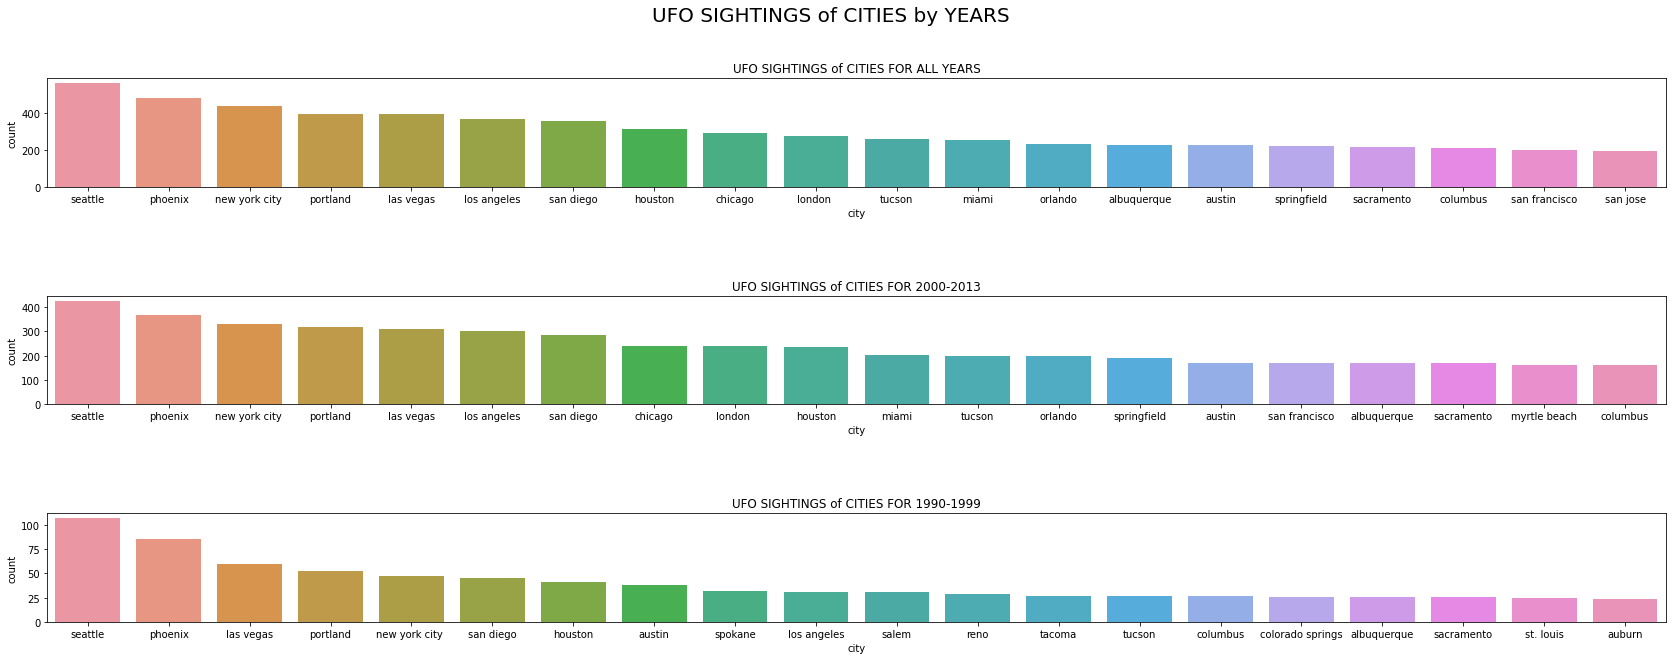

In [25]:

fig, axes = plt.subplots(nrows=3,figsize=(29,10))

sns.countplot(ax = axes[0], data=ufos, x="city", order=ufos["city"].value_counts()[:20].index)
axes[0].set_title("UFO SIGHTINGS of CITIES FOR ALL YEARS")

sns.countplot(ax = axes[1], data=ufos[ufos["year"].isin(list(range(2000,2014)))], x="city", order=ufos["city"][ufos["year"].isin(list(range(2000,2014)))].value_counts()[:20].index)
axes[1].set_title("UFO SIGHTINGS of CITIES FOR 2000-2013")

sns.countplot(ax = axes[2], data=ufos[ufos["year"].isin(list(range(1990,2000)))], x="city", order=ufos["city"][ufos["year"].isin(list(range(1990,2000)))].value_counts()[:20].index)
axes[2].set_title("UFO SIGHTINGS of CITIES FOR 1990-1999")

fig.suptitle("UFO SIGHTINGS of CITIES by YEARS",fontsize=20)
fig.subplots_adjust(wspace=1, hspace=1)


- ### From these graphs, we can say Seattle and Phoenix generally in the top two. 
- ### We can say that the trend for New York City goes up more than Portland and Las Vegas.
- ### As well as Portland keeps his place over time. 
- ### The trend for Las Vegas was less than Portland and New York City. 
- ### Also, we can say that trend for Los Angeles is notable. 
- ### We can also say that trend for San Diego is more stable compared to others and same with Houston. 
- ### The trend for Chiago is upwards and same with London, Tucson and Miami.